# **CHECKPOINT 3**

Data Source : https://www.kaggle.com/datasets/sujalsuthar/food-delivery-order-history-data

Judul Data : Food Delivery Order History Data

## **Matplotlib & Seaborn**

Pertama tama kita perlu mengimport modul python yang kita perlukan pada checkpoint kali ini saya menginport matplotlib dan seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lakukan read file agar file dataset bisa terbaca

In [8]:
filename = list(uploaded.keys())[0]
df = pd.read_csv("/content/archive (2).zip")

In [9]:
df

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21316,21467440,The Chicken Junction,Chittaranjan Park,Delhi NCR,6568490993,"03:26 AM, January 30 2025",Delivered,Zomato Delivery,5km,1 x Fried Chicken Desi Peri Peri Bites (Bone),...,NaN,NaN,NaN,NaN,NaN,14.32,9.0,Correctly,Wrong item(s) delivered,c6ee80eb35f2ef1630fd93ea88f8c0ac27eff57229a6d5...
21317,21467440,The Chicken Junction,Chittaranjan Park,Delhi NCR,6564842673,"02:44 AM, January 29 2025",Delivered,Zomato Delivery,5km,1 x Fried Chicken 65 Masala Boneless Bites,...,NaN,NaN,NaN,NaN,NaN,NaN,10.8,Missed,NaN,d2a0153ba6512894c1bebe974f6898ba10df50abc2c954...
21318,21523055,Masala Junction,Sector 4,Delhi NCR,6553527557,"10:05 PM, January 24 2025",Delivered,Zomato Delivery,8km,1 x Korean Fried Chicken Slider,...,5.0,Yummy food! Delicious food! Lip smacking food!...,NaN,NaN,NaN,16.27,9.4,Incorrectly,NaN,0b6168cbaf96aa5a0ae6b46d19d83ec9cad0d9508d43d7...
21319,21523055,Masala Junction,Sector 4,Delhi NCR,6541170157,"02:27 PM, January 21 2025",Delivered,Zomato Delivery,9km,1 x Ooh Saucy Fries,...,4.0,The peri peri fries were truly so tasty and de...,NaN,NaN,NaN,12.77,1.3,Correctly,NaN,410b3e056e511e3423d9497c629ca897f91cace2a2a732...


Berdasarkan studi kasus yang saya analisis, kini saya ingin mengetahui hubungan jarak pengiriman dan waktu tunggu dalam bentuk visualisasi sehingga saya membuat grafik scatter plot , disini saya membuat data baru yaitu items in order

In [35]:
df["Items Count"] = df["Items in order"].fillna("").apply(lambda x: len(x.split(',')))


Disini saya mengubah tipe data ke bentuk numerik

In [36]:
df["KPT duration (minutes)"] = pd.to_numeric(df["KPT duration (minutes)"], errors='coerce')

Pada bagian ini saya menghapus data kosong yang terdapat di bagian yang ingin saya gunakan sehingga data yang dihasilkan valid

In [13]:
df_clean = df.dropna(subset=["Distance", "KPT duration (minutes)"])

Selanjutnya saya memvisualisasikan data sesuai studi kasus saya yang ingin saya ketahui dan ini adalah bentuk grafik scatter plot dari jumlah item dan waktu pemrosesan

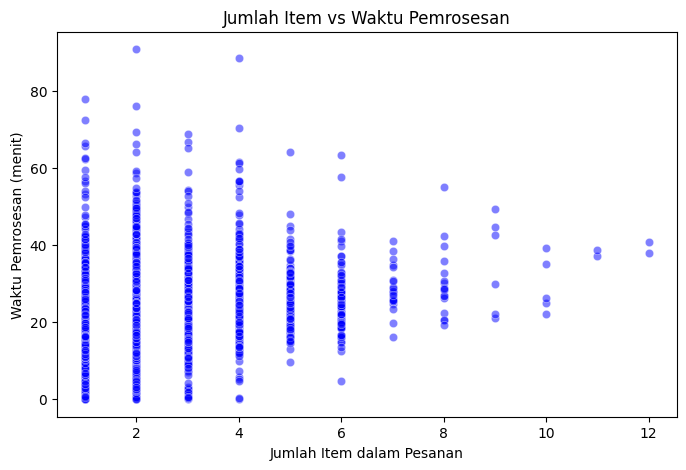

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_clean["Items Count"], y=df_clean["KPT duration (minutes)"], alpha=0.5, color="blue")
plt.xlabel("Jumlah Item dalam Pesanan")
plt.ylabel("Waktu Pemrosesan (menit)")
plt.title("Jumlah Item vs Waktu Pemrosesan")
plt.show()


Ini merupakan visualisasi dari jumlah item dan waktu pemrosesan yang menggunakan modul seaborn

Kemudian saya ingin memvisualisasikan data 10 restoran teratas berdasarkan jumlah pemesanan. di bagian ini saya membuat

In [22]:
df["Items Count"] = df["Items in order"].fillna("").apply(lambda x: len(x.split(',')))

Disini saya mengubah datatype kpt duration per menit ke bentuk numeric agar data dapat divisualisasikan dengan mudah

In [23]:
df["KPT duration (minutes)"] = pd.to_numeric(df["KPT duration (minutes)"], errors='coerce')

pada bagian ini saya menghapus kolom kosong pada bagian item count dan kpt duration

In [24]:
df_clean = df.dropna(subset=["Items Count", "KPT duration (minutes)"])

selanjutnya saya mengatur agar table hanya menampilkan 10 restoran teratas

In [27]:
top_restaurants = df["Restaurant name"].value_counts().head(10)

Lalu saya membuat bar chart karena bar chart adalah tipe yang paling kompatible untuk menampilkan top 10 restoran ter laris

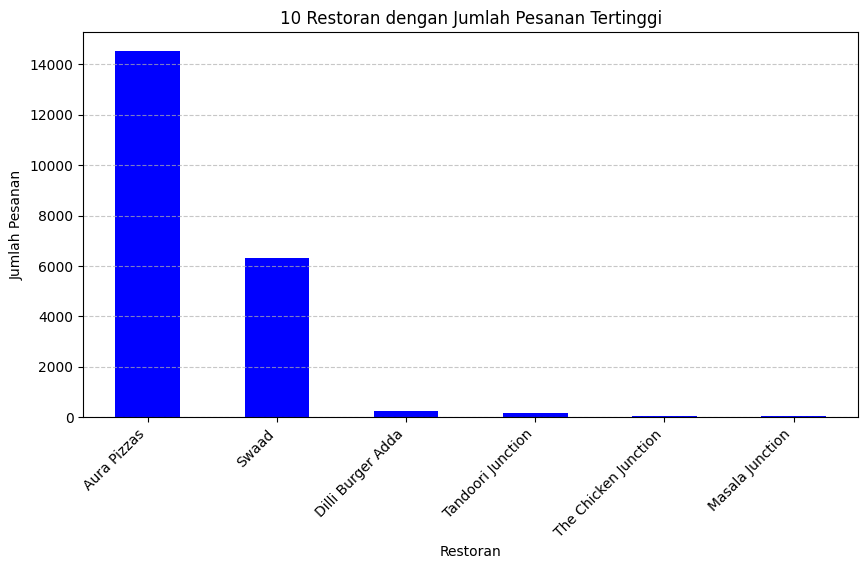

In [28]:
plt.figure(figsize=(10, 5))
top_restaurants.plot(kind='bar', color='blue')
plt.xlabel("Restoran")
plt.ylabel("Jumlah Pesanan")
plt.title("10 Restoran dengan Jumlah Pesanan Tertinggi")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ini adalah bentuk visualisasi bar chart dari 10 restoran teratas berdasarkan jumlah pemesanan (terlaris) dengan menggunakan modul matplotlib